<a href="https://colab.research.google.com/github/AdithyaMaddala/Analysis-for-AeroFit-Treadmill-Products/blob/main/aerofit_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First step is to import required libraries
import warnings #Optional
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#downloading and importing dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
df = pd.read_csv('aerofit_treadmill.csv?1639992749')
df.head()

--2024-04-01 15:38:05--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.102, 13.35.37.7, 13.35.37.31, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.1’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-04-01 15:38:06 (92.6 MB/s) - ‘aerofit_treadmill.csv?1639992749.1’ saved [7279/7279]



,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Column/features wise explaination:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the
treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

#<font color=''>1. Defining Problem Statement and Analysing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
print(f'Shape of Aerofit dataframe is {df.shape}')

Shape of Aerofit dataframe is (180, 9)


In [ ]:
df.info() #datatypes of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#<font color=''>2. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)


<font color='green'>**Actually value counts does gives us the unique attributes so there will be no need of seperate operations on unique attributes**

In [ ]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [ ]:
df[df.Age==25]['Product'].value_counts() #Most bought age is 25 and mid level product is most preferred by them

KP481    11
KP281     7
KP781     7
Name: Product, dtype: int64

In [ ]:
df.Gender.value_counts() #Male gender customers bought more than female gender customers

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df.Age.min(),df.Age.max(),np.round(df.Age.mean(),2),df.Age.median(),df.Age.mode()
#customers with min age of 18 and max age of 50 bought the product
#Average,Median age of customers buying the product is 28-29, 26 respectively
# Mostly 25 years customers bought the product

(18,
 50,
 28.79,
 26.0,
 0    25
 Name: Age, dtype: int64)

In [ ]:
df.Education.min(),df.Education.max() #

(12, 21)

In [ ]:
df.MaritalStatus.value_counts() #Partnered customers bought more than single customer

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
print(f'The min and max of usage {df.Usage.min(),df.Usage.max()}')
df.Usage.value_counts()
#Mostly 2 to 5 days a week the threadmill is being used by the customers

The min and max of usage (2, 7)


3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
print(f'The min and max of Income {df.Income.min(),df.Income.max()}')

The min and max of Income (29562, 104581)


In [ ]:
df.Miles.min(),df.Miles.max()

(21, 360)

In [ ]:
df.Income.describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

**Miles is average of a week of a person**

In [ ]:
df[df.Product=='KP281']['Miles'].aggregate(['min','max','mean','median'])


min        38.0000
max       188.0000
mean       82.7875
median     85.0000
Name: Miles, dtype: float64

In [ ]:
df[df.Product=='KP481']['Miles'].aggregate(['min','max','mean','median'])
#some of mid level runners

min        21.000000
max       212.000000
mean       87.933333
median     85.000000
Name: Miles, dtype: float64

In [ ]:
df[df.Product=='KP781']['Miles'].aggregate(['min','max','mean','median'])
#Advance featured threadmill buyers are more working out because their mean

min        80.0
max       360.0
mean      166.9
median    160.0
Name: Miles, dtype: float64

#<font color=''>MARGINAL & CONDITIONAL PROBABILITIES

In [ ]:
pd.crosstab(df.Product,df.MaritalStatus,margins=True,normalize=True)
#Marginal probability of purchasing a product
#p(KP281) = 0.44
#P(KP481) = 0.33
#P(KP781) = 0.22
#P(Partnered) = 0.59
#P(Single) = 0.40
#P(Male) = 0.57
#P(Female) = 0.43
#so according to the data available most sold treadmill is entry level product

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [ ]:
pd.crosstab(df.Product,df.MaritalStatus,margins=True,normalize='index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


In [ ]:
pd.crosstab(df.Product,df.MaritalStatus,margins=True,normalize='columns')

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


In [ ]:
#for all 3 products partnered sales are > single sales
# p(KP281|Partnered) = 0.449
# p(KP481|Partnered) = 0.337
# p(KP781|Partnered) = 0.215

In [ ]:
pd.crosstab(df.Product, df.Gender,margins=True)
#Entry level product is equally sold to both the genders (22% each)
#mid level product is almost equally sold to both the genders (Female - 16%, Male - 17%)
#advanced featured product is mostly purchased by males (Female - 3%, Male = 18%)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
pd.crosstab(df.Product, df.Gender,margins=True,normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [ ]:
pd.crosstab(df.Product, df.Gender,margins=True,normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


In [ ]:
pd.crosstab(df.Product, df.Gender,margins=True,normalize='columns')
#p(female|KP281) = 0.52, #p(male|KP281) = 0.38
#p(female|KP481) = 0.38, #p(male|KP481) = 0.30
#p(female|KP781) = 0.09, #p(male|KP781) = 0.32
#with above data we can conclude that females are more likely to purchase entry level and mid-level and avoid advanced product
#Male gendered persons prefer any product with almost same probability and less prefered is mid-level threadmil

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


In [ ]:
pd.crosstab(df.Gender,df.MaritalStatus)
#Parterned males and females bought the product more than single
#recommedation - Partnered persons are more likely to purchase the product as per the records and that is for the reason might be one product can be used by both wife and husband

MaritalStatus,Partnered,Single
Gender,,
Female,46,30
Male,61,43


#<font color=''>3. Visual Analysis - Univariate & Bivariate (30 Points)


**3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)**

#Univariate analysis

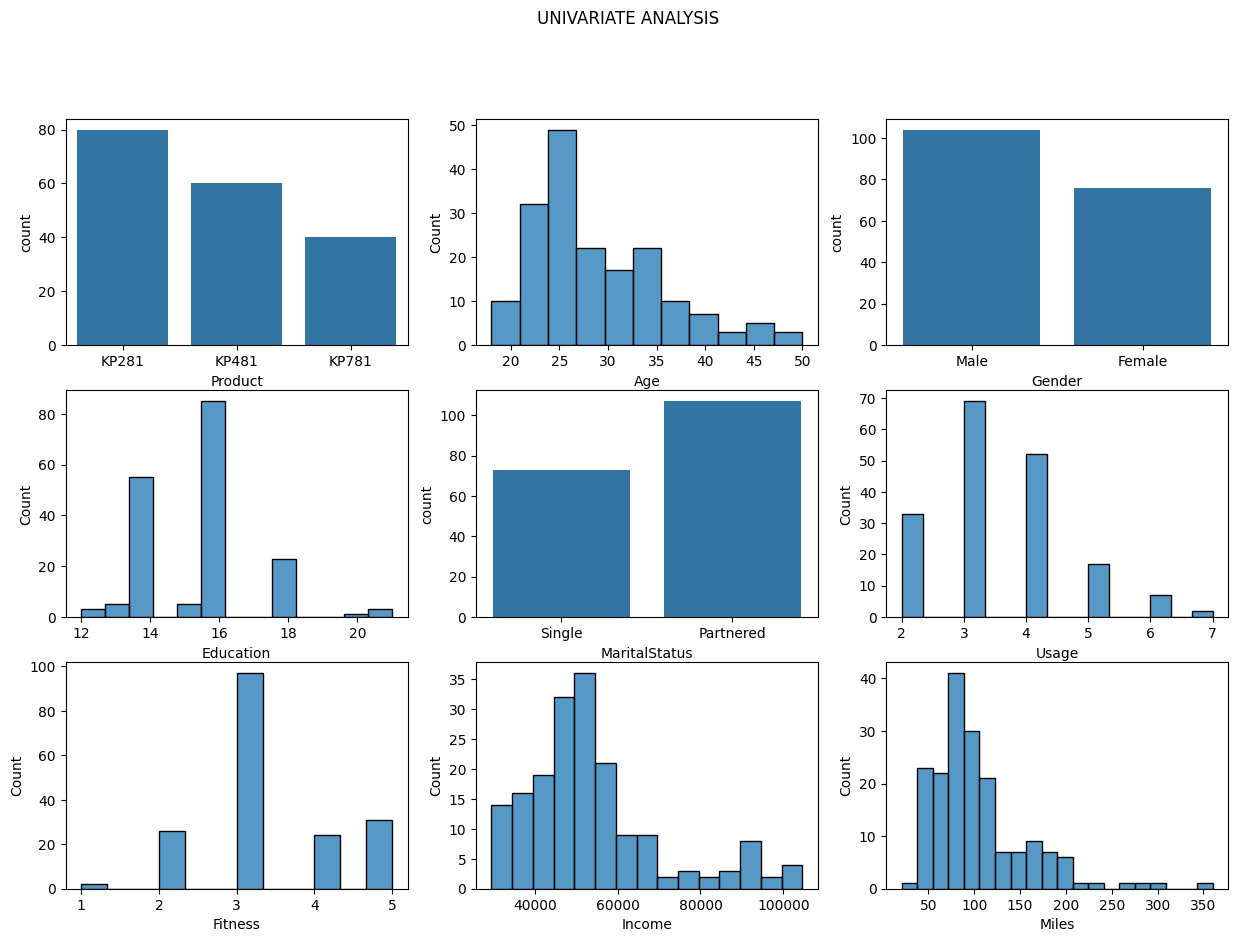

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(x=df.Product)
plt.subplot(3,3,2)
sns.histplot(df.Age)
plt.subplot(3,3,3)
sns.countplot(x=df.Gender)
plt.subplot(3,3,4)
sns.histplot(df.Education)
plt.subplot(3,3,5)
sns.countplot(x=df.MaritalStatus)
plt.subplot(3,3,6)
sns.histplot(df.Usage)
plt.subplot(3,3,7)
sns.histplot(df.Fitness)
plt.subplot(3,3,8)
sns.histplot(df.Income)
plt.subplot(3,3,9)
sns.histplot(df.Miles)
plt.suptitle('UNIVARIATE ANALYSIS',va='center')
plt.show()

In [ ]:
len(df[(df.Usage==5) & (df.Product=='KP781')])+len(df[(df.Usage==6) & (df.Product=='KP781')])+len(df[(df.Usage==7) & (df.Product=='KP781')])

21

In [ ]:
len(df[(df.Miles>=50) & (df.Miles<=120)])/len(df)

0.6722222222222223

In [ ]:
#Insights:
#Entry level product is most sold
#Median purchaser age is 26
#Male bought more than female
#Customers with education of 14,16,18 bought 90% of the products
#Partnered customers prefer to buy the product more likely than singe
#Most of the customers use 2-4 times a week and more than 50% customers with advanced threadmill use atleast 5 days a week
#On average most of the customers rate their body shape 3 after working out with threadmill
#customers with an avg income of 50k purchase more likely than higher income customers (Reason: Lack of time to think about body workout)
#about 67% the customers run about 50-120 miles per week

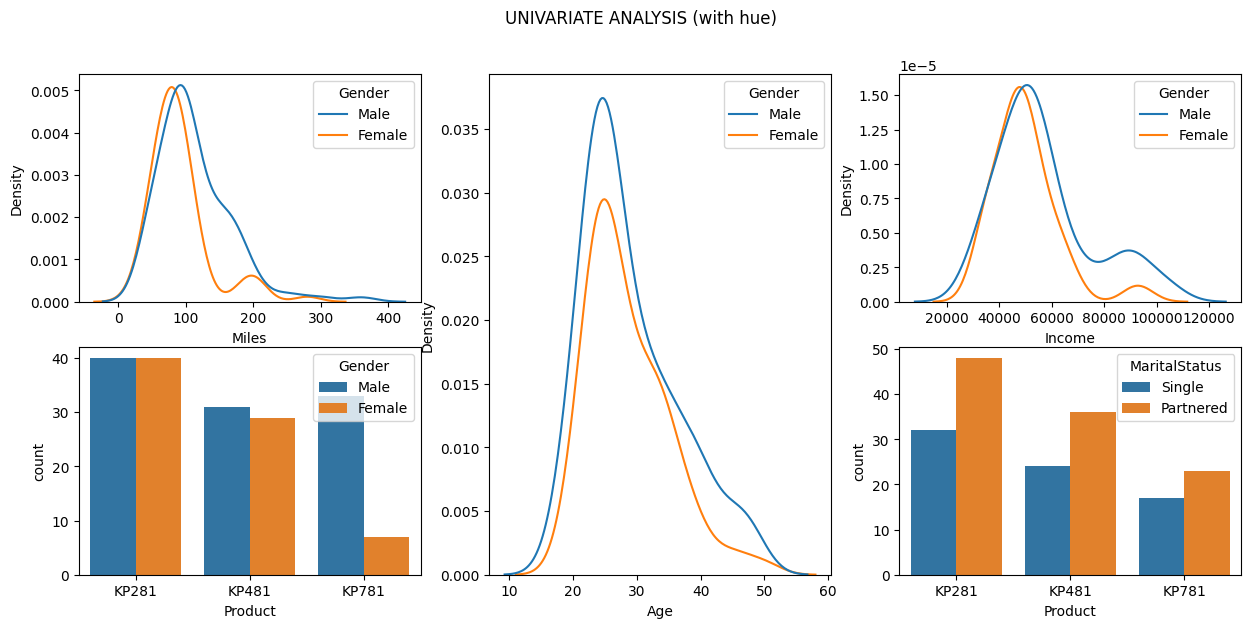

In [ ]:
plt.figure(figsize=(15,6.5))
plt.subplot(2,3,1)
sns.kdeplot(data=df,x='Miles',hue='Gender')
plt.subplot(2,3,(2,5))
sns.kdeplot(data = df,x = 'Age',hue = 'Gender')
plt.subplot(2,3,3)
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.subplot(2,3,4)
sns.countplot(data = df,x='Product',hue='Gender')
plt.subplot(2,3,6)
sns.countplot(data = df,x='Product',hue='MaritalStatus')
plt.suptitle('UNIVARIATE ANALYSIS (with hue)')
plt.show()

In [ ]:
#Insights
#Male customers workout a bit more than female customers
#25-27 years aged male and female tend to purchase more then other age groups
#female and male max purchasers are between 40k to 60k income
#here most of the people prefer low priced threadmill
#Male prefer more fitness than female
#Advanced featured threadmill if mostly preferred by males
#Partnered and single most bought entry level product, partnered customers are more likely to buy than single customers

#Bivariate analysis
scatter plots

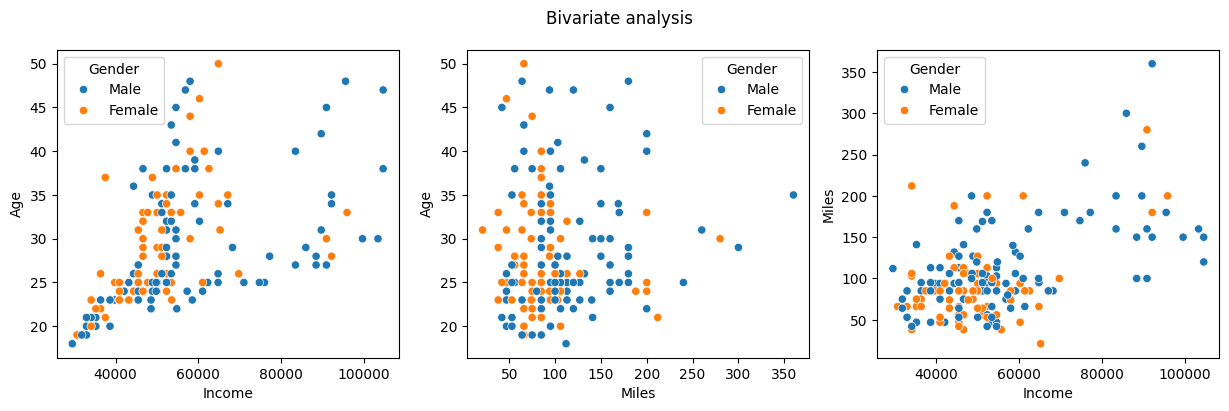

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='Income',y='Age',hue='Gender') #positive correlation
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='Miles',y='Age',hue='Gender')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='Income',y='Miles',hue='Gender')
plt.suptitle('Bivariate analysis')
plt.show()

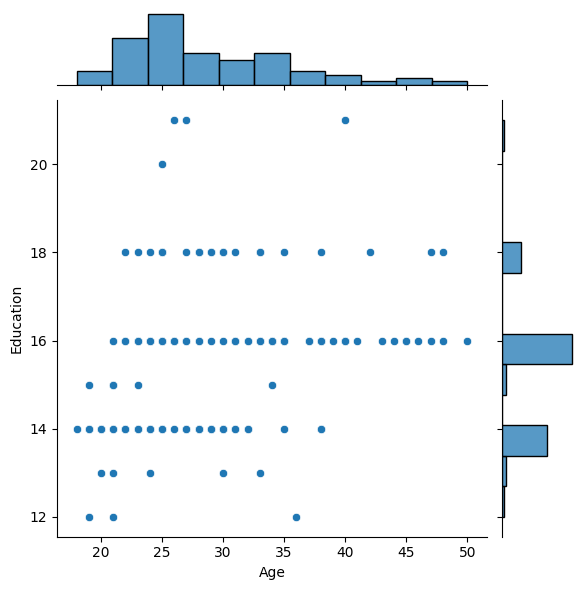

In [ ]:
sns.jointplot(data=df,x='Age',y='Education') #customers with education of 14, 16 with age of 25 are more in number
plt.show()

#3.2 For categorical variable(s): Boxplot (10 Points)


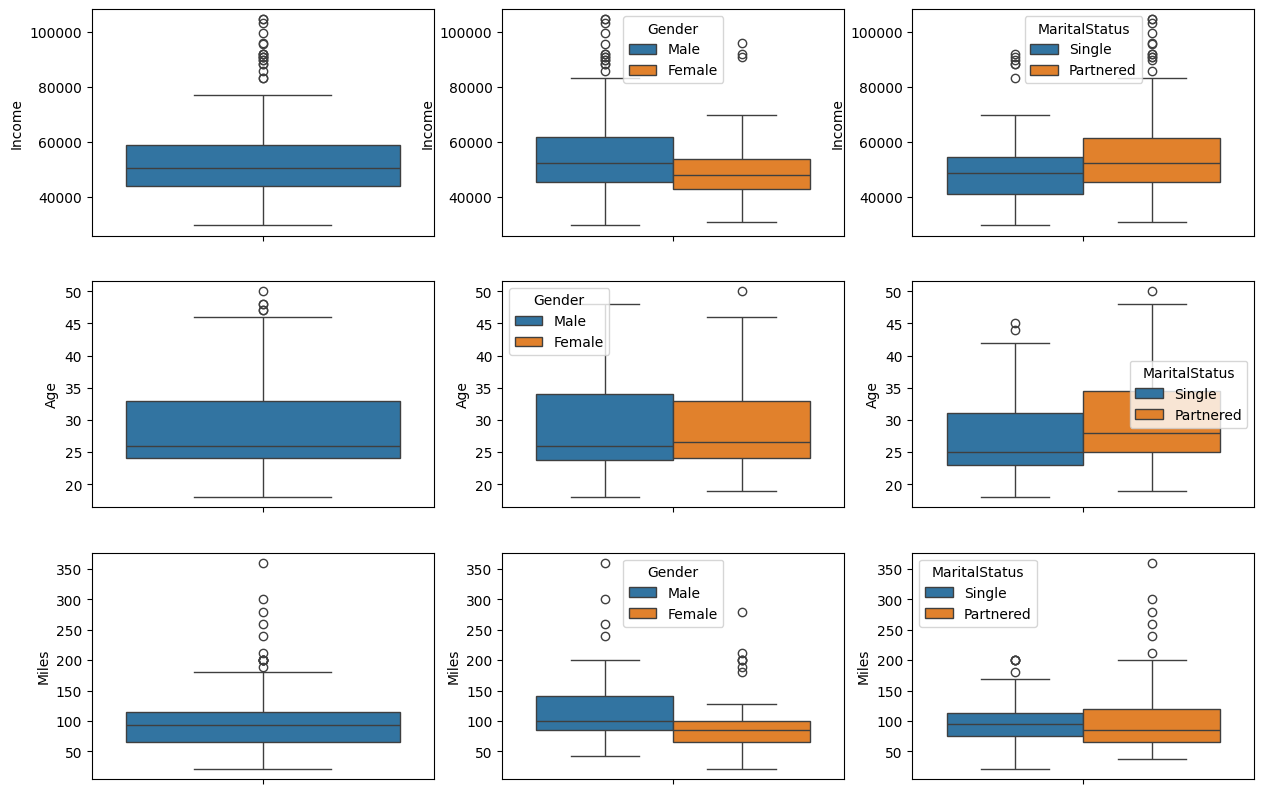

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(data=df,y='Income')
plt.subplot(3,3,2)
sns.boxplot(data=df,y='Income',hue='Gender')
plt.subplot(3,3,3)
sns.boxplot(data=df,y='Income',hue='MaritalStatus')
#Total 42 outliers for income column
plt.subplot(3,3,4)
sns.boxplot(data=df,y='Age')
plt.subplot(3,3,5)
sns.boxplot(data=df,y='Age',hue='Gender')
plt.subplot(3,3,6)
sns.boxplot(data=df,y='Age',hue='MaritalStatus')
#1 outlier for female age
plt.subplot(3,3,7)
sns.boxplot(data=df,y='Miles')
plt.subplot(3,3,8)
sns.boxplot(data=df,y='Miles',hue='Gender')
plt.subplot(3,3,9)
sns.boxplot(data=df,y='Miles',hue='MaritalStatus')
#Total 9 outliers for Miles column
plt.show()

In [ ]:
# Insights
# Total number of outliers (19 + 23) for Income is 42
# Income of most of the customer who bought thread mill ranges in (44058.75, 58668.0)
# Total number of outliers (5 + 5) for Age is 10
# Total number of outliers (5 + 5) for Age is 10
# Age of most of the customer who bought thread mill ranges in (24.0, 33.0)
# Total number of outliers (13 + 4) for Miles is 17
# Miles of most of the customer who bought thread mill ranges in (66.0, 114.75)

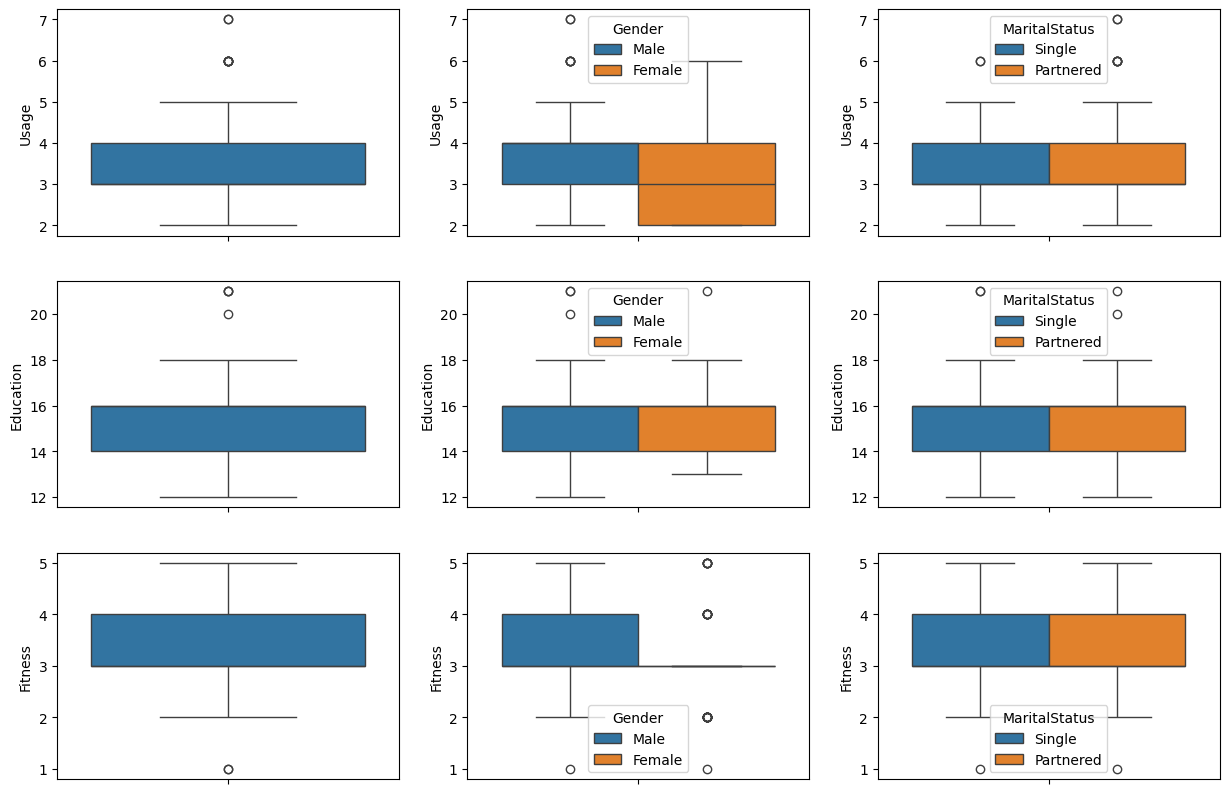

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(data=df,y='Usage')
plt.subplot(3,3,2)
sns.boxplot(data=df,y='Usage',hue='Gender')
plt.subplot(3,3,3)
sns.boxplot(data=df,y='Usage',hue='MaritalStatus')
plt.subplot(3,3,4)
sns.boxplot(data=df,y='Education')
plt.subplot(3,3,5)
sns.boxplot(data=df,y='Education',hue='Gender')
plt.subplot(3,3,6)
sns.boxplot(data=df,y='Education',hue='MaritalStatus')
plt.subplot(3,3,7)
sns.boxplot(data=df,y='Fitness')
plt.subplot(3,3,8)
sns.boxplot(data=df,y='Fitness',hue='Gender')
plt.subplot(3,3,9)
sns.boxplot(data=df,y='Fitness',hue='MaritalStatus')
plt.show()

In [ ]:
# Insights
# Total number of outliers (4 + 3) for Education is 7
# Education of most of the customer who bought thread mill ranges in (14.0, 16.0)
# Total number of outliers (0 + 28) for Fitness is 28
# Fitness of most of the customer who bought thread mill ranges in (3.0, 4.0)
# Total number of outliers (9 + 33) for Usage is 42
# Usage of most of the customer who bought thread mill ranges in (3.0, 4.0)

In [ ]:
#Insight
'''
From the above box plots we can say that most of the customers of age 24 to 33,
Gender - Male, Income from 44k to 58k bought most of the products from aerofit
'''

#3.3 For correlation: Heatmaps, Pairplots(10 Points)

<Figure size 1800x1800 with 0 Axes>

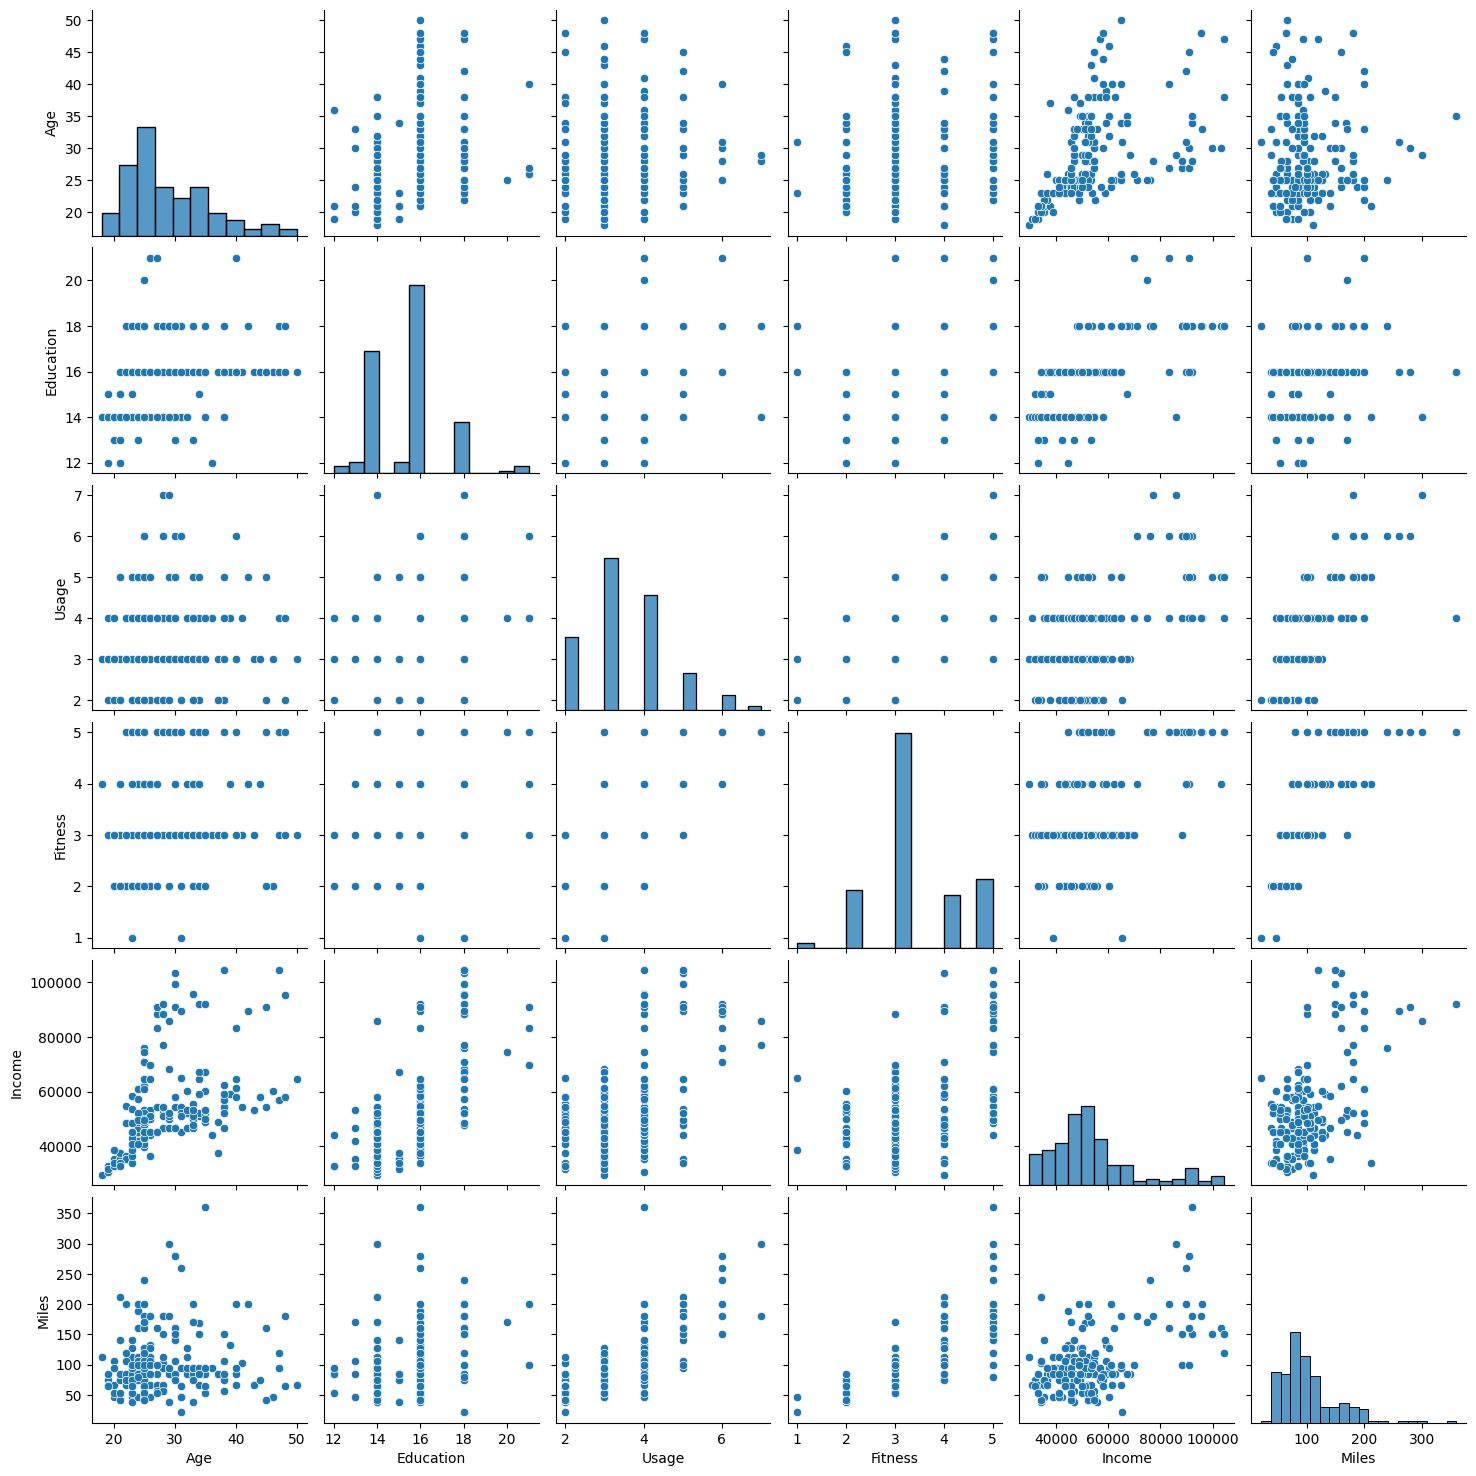

<Figure size 1800x1800 with 0 Axes>

In [ ]:
sns.pairplot(data=df)
plt.figure(figsize=(18,18))

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


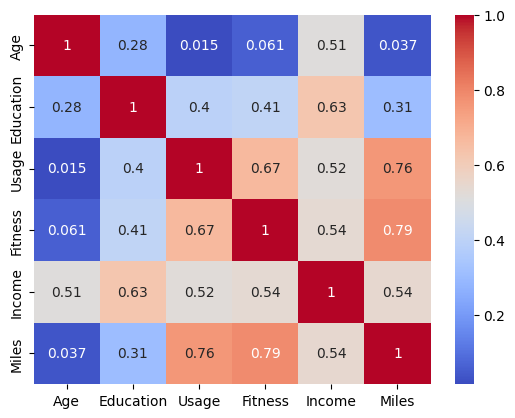

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

#<font color=''>4. Missing Value & Outlier Detection (10 Points)

In [ ]:
#Number of nulls
print(f'Total number of nulls present in df are {df.isna().sum().sum()}')

Total number of nulls present in df are 0


#IQR

In [ ]:
#Income IQR
col ='Income'
Q1 = np.percentile(df[col],25)
Q2 = np.percentile(df[col],50)
Q3 = np.percentile(df[col],75)
iqr = Q3 - Q1
upper = Q3 + 1.5 * iqr
lower = Q3 - 1.5 * iqr
outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower])
print(f'Total number of outliers ({len(df[col][df[col]> upper])} + {len(df[col][df[col]< lower])}) for {col} is {outliers}')
print(f'{col} of most of the customer who bought thread mill ranges in {Q1,Q3}')

Total number of outliers (19 + 23) for Income is 42
Income of most of the customer who bought thread mill ranges in (44058.75, 58668.0)


In [ ]:
#Age IQR
col ='Age'
Q1, Q2, Q3 = np.percentile(df[col],25), np.percentile(df[col],50), np.percentile(df[col],75)
iqr = Q3 - Q1
upper, lower = Q3 + 1.5 * iqr, Q3 - 1.5 * iqr
outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower])
print(f'Total number of outliers ({len(df[col][df[col]> upper])} + {len(df[col][df[col]< lower])}) for {col} is {outliers}')
print(f'{col} of most of the customer who bought thread mill ranges in {Q1,Q3}')

Total number of outliers (5 + 5) for Age is 10
Age of most of the customer who bought thread mill ranges in (24.0, 33.0)


In [ ]:
#Miles IQR
col ='Miles'
Q1, Q2, Q3 = np.percentile(df[col],25), np.percentile(df[col],50), np.percentile(df[col],75)
iqr = Q3 - Q1
upper, lower = Q3 + 1.5 * iqr, Q3 - 1.5 * iqr
outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower])
print(f'Total number of outliers ({len(df[col][df[col]> upper])} + {len(df[col][df[col]< lower])}) for {col} is {outliers}')
print(f'{col} of most of the customer who bought thread mill ranges in {Q1,Q3}')

Total number of outliers (13 + 4) for Miles is 17
Miles of most of the customer who bought thread mill ranges in (66.0, 114.75)


In [ ]:
#Education IQR
col ='Education'
Q1, Q2, Q3 = np.percentile(df[col],25), np.percentile(df[col],50), np.percentile(df[col],75)
iqr = Q3 - Q1
upper, lower = Q3 + 1.5 * iqr, Q3 - 1.5 * iqr
outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower])
print(f'Total number of outliers ({len(df[col][df[col]> upper])} + {len(df[col][df[col]< lower])}) for {col} is {outliers}')
print(f'{col} of most of the customer who bought thread mill ranges in {Q1,Q3}')

Total number of outliers (4 + 3) for Education is 7
Education of most of the customer who bought thread mill ranges in (14.0, 16.0)


In [ ]:
#Fitness IQR
col ='Fitness'
Q1, Q2, Q3 = np.percentile(df[col],25), np.percentile(df[col],50), np.percentile(df[col],75)
iqr = Q3 - Q1
upper, lower = Q3 + 1.5 * iqr, Q3 - 1.5 * iqr
outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower])
print(f'Total number of outliers ({len(df[col][df[col]> upper])} + {len(df[col][df[col]< lower])}) for {col} is {outliers}')
print(f'{col} of most of the customer who bought thread mill ranges in {Q1,Q3}')

Total number of outliers (0 + 28) for Fitness is 28
Fitness of most of the customer who bought thread mill ranges in (3.0, 4.0)


In [ ]:
#Usage IQR
col ='Usage'
Q1, Q2, Q3 = np.percentile(df[col],25), np.percentile(df[col],50), np.percentile(df[col],75)
iqr = Q3 - Q1
upper, lower = Q3 + 1.5 * iqr, Q3 - 1.5 * iqr
outliers = len(df[col][df[col]> upper]) + len(df[col][df[col]< lower])
print(f'Total number of outliers ({len(df[col][df[col]> upper])} + {len(df[col][df[col]< lower])}) for {col} is {outliers}')
print(f'{col} of most of the customer who bought thread mill ranges in {Q1,Q3}')

Total number of outliers (9 + 33) for Usage is 42
Usage of most of the customer who bought thread mill ranges in (3.0, 4.0)


#6. Recommendations

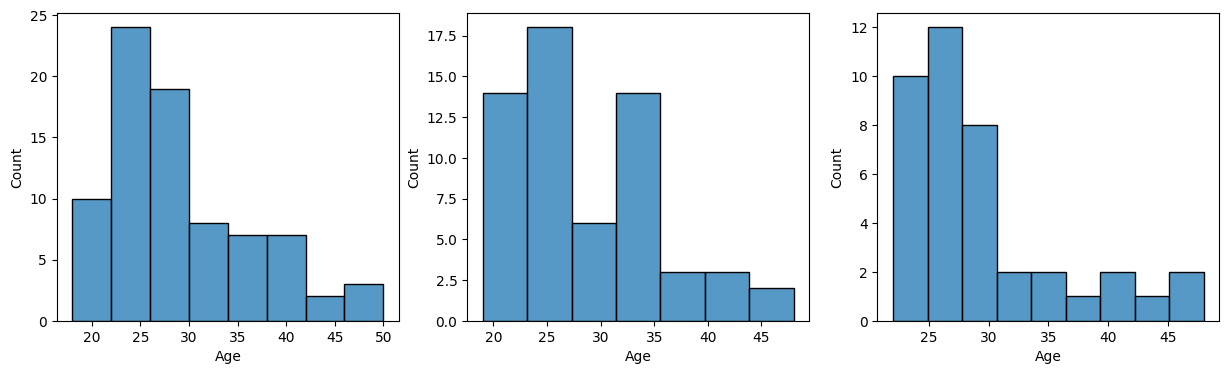

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(df.Age[df.Product=='KP281'])
plt.subplot(1,3,2)
sns.histplot(df.Age[df.Product=='KP481'])
plt.subplot(1,3,3)
sns.histplot(df.Age[df.Product=='KP781'])
plt.show()

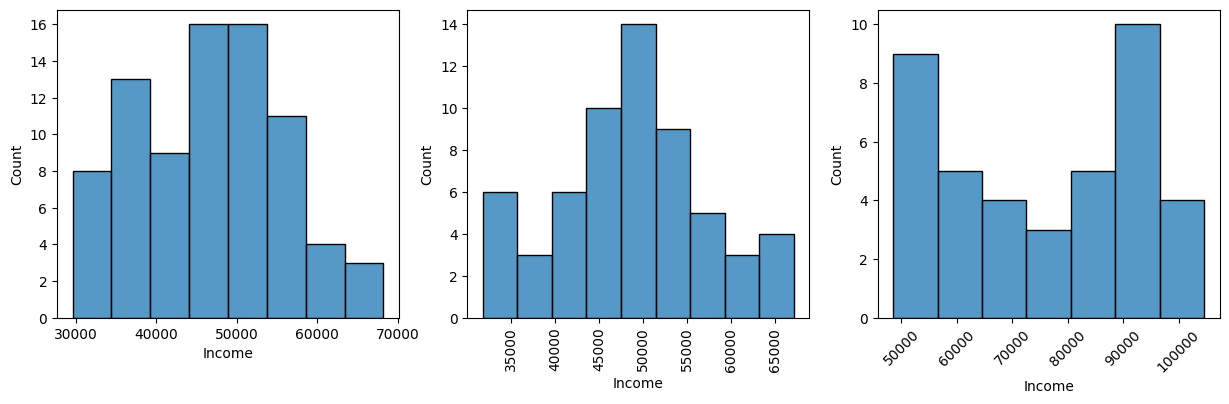

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(df.Income[df.Product=='KP281'])
plt.subplot(1,3,2)
sns.histplot(df.Income[df.Product=='KP481'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.histplot(df.Income[df.Product=='KP781'])
plt.xticks(rotation=45)
plt.show()